<a href="https://colab.research.google.com/github/ghrahul/ML-DL-PRACTICE/blob/master/NLP_USING_TENSORFLOW/conv_and_globalavgpooling_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer GRU

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [0]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWXSAYM/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWXSAYM/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWXSAYM/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 33s 84ms/step - loss: 0.4443 - accuracy: 0.7891 - val_loss: 0.3086 - val_accuracy: 0.8791
Epoch 2/10
391/391 [==============================] - 21s 53ms/step - loss: 0.2251 - accuracy: 0.9154 - val_loss: 0.3067 - val_accuracy: 0.8761
Epoch 3/10
391/391 [==============================] - 19s 48ms/step - loss: 0.1705 - accuracy: 0.9374 - val_loss: 0.3332 - val_accuracy: 0.8718
Epoch 4/10
391/391 [==============================] - 18s 47ms/step - loss: 0.1362 - accuracy: 0.9520 - val_loss: 0.3715 - val_accuracy: 0.8715
Epoch 5/10
391/391 [==============================] - 18s 46ms/step - loss: 0.1074 - accuracy: 0.9635 - val_loss: 0.4353 - val_accuracy: 0.8661
Epoch 6/10
391/391 [==============================] - 18s 46ms/step - loss: 0.0835 - accuracy: 0.9733 - val_loss: 0.5264 - val_accuracy: 0.8560
Epoch 7/10
391/391 [==============================] - 18s 46ms/step - loss: 0.0646 - accuracy: 0.9796 - val_loss: 0.6183 - val_accuracy:

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

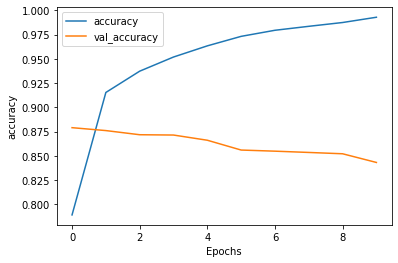

In [0]:
plot_graphs(history, 'accuracy')

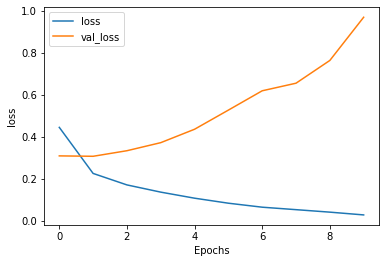

In [0]:
plot_graphs(history, 'loss')